# **Gradient Descent (GD), Stochastic Gradient Descent (SGD), and Batch Gradient Descent (Batch GD)**

### **Group Members:**
* Ch. Siddharth (BCD21)
* K Sri Chaitan (BCD38)
* K Karthik Raj (BCD41)

## **Introduction:**

The code implements three gradient-based optimization algorithms—Gradient Descent (GD), Stochastic Gradient Descent (SGD), and Batch Gradient Descent (Batch GD)—to find the optimal parameters of a linear regression model for the California Housing dataset. It visualizes the optimization process by plotting the paths of each algorithm on a contour plot of the loss function.

## Key Functions:

1. `compute_loss`: Calculates the error of the model's predictions using Mean Squared Error (MSE). It's essential for evaluating how well the model is performing.
2. `gradient_descent`: The core optimization function that iteratively adjusts the model's parameters (theta) to minimize the loss. It uses the entire dataset in each step.
3. `stochastic_gradient_descent`: A variation of gradient descent that updates parameters based on a single, randomly chosen data point at a time. It's often faster but less stable than GD.
4. `batch_gradient_descent`: A compromise between GD and SGD, using a small batch of data points for each update. Offers a balance between speed and stability.
5. `plot_contours_and_paths`: This function is responsible for creating the visualization that shows the loss landscape and how each optimization algorithm navigates it. It helps in understanding the behavior of the algorithms.

In essence, these functions work together to:
1. Define the problem (loss function)
2. Search for the best solution (optimization algorithms)
3. Visualize the search process (plotting function)

## **Functionality:**

1. Data Loading and Preprocessing: Loads the California Housing dataset, selects two features for visualization, standardizes the features using StandardScaler, and adds a bias term to the feature matrix.

2. Loss Function: Defines the Mean Squared Error (MSE) loss function to measure the model's performance.

3. Optimization Algorithms: Implements GD, SGD, and Batch GD to find the optimal model parameters (theta) that minimize the loss function.

4. Visualization: Creates a contour plot of the loss function and overlays the paths taken by each optimization algorithm during the search for the optimal parameters.

## **Library Imports and Documentation**

1. import numpy as np:
  * Purpose: Imports the NumPy library and assigns it the alias np. NumPy is fundamental for numerical computations in Python, providing support for arrays, matrices, and mathematical functions.
  * Usage in the code: NumPy is used extensively throughout the code for:
    * Creating and manipulating arrays to store and process data (e.g., features, targets).
    * Performing mathematical operations on arrays, such as calculating the loss, gradients, and updating model parameters.
2. import matplotlib.pyplot as plt:
  * Purpose: Imports the pyplot module from Matplotlib and assigns it the alias plt. Matplotlib is a popular library for creating visualizations in Python.
  * Usage in the code: pyplot is used to create the contour plot that visualizes the loss function and the paths taken by the optimization algorithms. This helps in understanding how the algorithms search for the optimal solution.
3. from sklearn.datasets import fetch_california_housing:
  * Purpose: Imports the fetch_california_housing function from the sklearn.datasets module. This function is used to load the California Housing dataset.
  * Usage in the code: fetch_california_housing is called to load the dataset, which is then used for training and evaluating the linear regression models.
4. from sklearn.preprocessing import StandardScaler:
  * Purpose: Imports the StandardScaler class from the sklearn.preprocessing module. This class is used for feature scaling.
  * Usage in the code: StandardScaler is used to standardize the features of the California Housing dataset before applying the optimization algorithms. This helps to improve the performance and stability of the algorithms.

### In essence, this cell sets the stage for the subsequent code by providing access to the necessary tools and data:

* NumPy for numerical computations
* Matplotlib for visualization
* Scikit-learn for the dataset and data preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler


## **California Housing dataset**

This cell performs the following actions:

1. Loads the Dataset: It uses the fetch_california_housing() function from scikit-learn to load the California Housing dataset. This dataset contains information about various features of houses in California, along with their median house values.

2. Separates Features and Target: It then extracts the features (input variables) and the target (output variable) from the loaded dataset.

  * X_full stores the features (e.g., median income, house age, average rooms, etc.).

  * y_full stores the target variable, which is the median house value.

3. Reshapes Target: It reshapes the target variable (y_full) into a column vector using reshape(-1, 1). This is often done to ensure compatibility with certain machine learning algorithms that expect the target variable to be in this format.

### **In essence:**

This cell sets up the data for use in the subsequent parts of the code. It loads the California Housing dataset, separates the features and target variable, and ensures that the target variable is in the correct shape for use in machine learning models.


In [ ]:
# Load the California Housing dataset
housing = fetch_california_housing()
X_full, y_full = housing.data, housing.target
y_full = y_full.reshape(-1, 1)

## **Select only two features for visualization purposes:**

1. Feature Selection: It selects only the first two features from the full feature matrix X_full using slicing ([:, :2]). This is done to simplify the visualization of the loss function, as it's easier to plot in 2D.

2. Feature Scaling: It creates an instance of the StandardScaler class from scikit-learn and uses it to standardize the selected features (X). This scaling ensures that all features have a similar range of values, which can improve the performance and stability of machine learning algorithms.

3. Target Variable Assignment: It assigns the full target variable (y_full) to a new variable y. This is likely done for consistency and convenience in later parts of the code.

### **In essence:**

This cell prepares the data specifically for the visualization of the loss function and the paths taken by the optimization algorithms. It selects two features for simplicity, scales them for better algorithm performance, and assigns the target variable for use in the model.

In [ ]:
# Select only two features for visualization purposes
X = X_full[:, :2]  # Using only the first two features for simplification
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y_full


## Adding bias term to X

This cell performs a crucial step for linear regression models by adding a bias term (also known as an intercept term) to the feature matrix X.

### **Explanation:**

1. X_b = np.c_[np.ones((X.shape[0], 1)), X]: This line uses NumPy's c_ function to horizontally stack two arrays:
  * np.ones((X.shape[0], 1)): This creates a column vector of ones with the same number of rows as the feature matrix X. This represents the bias term.
  * X: This is the feature matrix (with the selected and scaled features).
By combining these two arrays, a new feature matrix X_b is created, where the first column is the bias term (all ones), and the remaining columns are the original features.

### **Why add a bias term?**

The bias term is essential in linear regression because it allows the model to make predictions even when all the features are zero. It shifts the regression line up or down, allowing it to better fit the data. Without the bias term, the regression line would always be forced to pass through the origin (0, 0), which might not be appropriate for all datasets.

### **In essence:**

This cell modifies the feature matrix by adding a bias term, which is crucial for the proper functioning of linear regression models. This modification ensures that the model can learn a more flexible and accurate representation of the data.

In [ ]:
# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term for intercept

## **Mean Squared Error loss function**

This cell defines a function called compute_loss that calculates the MSE loss for a given set of features, target values, and model parameters. The MSE loss is a common metric used to evaluate the performance of regression models.

### **Explanation:**

1. def compute_loss(X, y, theta):: This line defines the function signature, specifying that it takes three arguments:

  * X: The feature matrix (including the bias term).
  * y: The target variable vector.
  * theta: The model parameters (weights).

2. return np.mean((X.dot(theta) - y) ** 2) / 2: This line calculates and returns the MSE loss. Let's break it down:

  * X.dot(theta): This performs the dot product between the feature matrix X and the model parameters theta, which essentially calculates the model's predictions.
  * (X.dot(theta) - y): This subtracts the actual target values (y) from the model's predictions, giving the errors or residuals.
  * (** 2): This squares the errors to ensure that positive and negative errors contribute equally to the loss.
  * np.mean(...): This calculates the average of the squared errors across all data points.
  * / 2: This divides the average squared error by 2, which is a common convention in the MSE formula (it simplifies the derivative for gradient-based optimization).

### **In essence:**

This cell defines the function that quantifies the error of the model's predictions using the MSE metric. This function will be used by the optimization algorithms to evaluate the model's performance and guide the search for the optimal parameters.

In [ ]:
# Define the Mean Squared Error loss function
def compute_loss(X, y, theta):
    return np.mean((X.dot(theta) - y) ** 2) / 2

## **Gradient Descent (GD) Implementation**

This cell defines a function called gradient_descent that implements the GD algorithm to find the optimal parameters (theta) for a linear regression model. GD is an iterative optimization algorithm that repeatedly updates the parameters in the direction of the negative gradient of the loss function.

### **Explanation:**

1. def gradient_descent(X, y, initial_theta, learning_rate=0.01, epsilon=1e-6, max_iterations=1000):: This line defines the function signature, specifying the input arguments:

  * X: The feature matrix (including the bias term).
  * y: The target variable vector.
  * initial_theta: The starting values for the model parameters.
  * learning_rate: The step size for parameter updates.
  * epsilon: The convergence threshold (for early stopping).
  * max_iterations: The maximum number of iterations.

2. theta = initial_theta.copy(): This line initializes the model parameters theta with a copy of the initial_theta values.
3. path = [theta.copy()]: This line initializes a list called path to store the values of theta during the optimization process. This is used for visualization later.
4. for iteration in range(max_iterations):: This loop iterates for a maximum of max_iterations.
5. gradients = X.T.dot(X.dot(theta) - y) / len(y): This line calculates the gradients of the loss function with respect to the parameters theta. This is the core of the GD algorithm, as it determines the direction of the parameter updates.
6. theta -= learning_rate * gradients: This line updates the parameters theta by subtracting the learning rate times the gradients. This moves the parameters in the direction of the negative gradient, aiming to minimize the loss function.
7. path.append(theta.copy()): This line appends the current values of theta to the path list.
8. if np.linalg.norm(gradients) < epsilon:: This condition checks if the magnitude of the gradients is below the convergence threshold epsilon. If so, it means that the algorithm has converged, and the loop is broken using break.
9. return theta, path: This line returns the final optimized parameters theta and the path taken during optimization.

### **In essence:**

This cell implements the Gradient Descent algorithm to iteratively update the model parameters and minimize the loss function. It uses the entire dataset in each step to calculate the gradients, making it suitable for smaller datasets but potentially slow for larger ones. The path is recorded to visualize the optimization process later.

In [ ]:
# Gradient Descent (GD) Implementation
def gradient_descent(X, y, initial_theta, learning_rate=0.01, epsilon=1e-6, max_iterations=1000):
    theta = initial_theta.copy()
    path = [theta.copy()]
    for iteration in range(max_iterations):
        gradients = X.T.dot(X.dot(theta) - y) / len(y)
        theta -= learning_rate * gradients
        path.append(theta.copy())

        # Early stopping condition
        if np.linalg.norm(gradients) < epsilon:
            break
    return theta, path


## **Stochastic Gradient Descent (SGD) Implementation**

This cell defines a function called stochastic_gradient_descent that implements the SGD algorithm to find the optimal parameters (theta) for a linear regression model. SGD is a variation of GD that updates the parameters based on the loss calculated from a single, randomly chosen data point at each iteration.

### **Explanation:**

1. def stochastic_gradient_descent(...): This line defines the function signature, similar to gradient_descent, specifying the input arguments.

1. Initialization: The code initializes theta, path, and m (number of data points) in the same way as gradient_descent.

1. Iteration: The loop iterates for a maximum of max_iterations.

1. Random Data Point Selection: In each iteration, a random index random_index is chosen using np.random.randint(m). This index is used to select a single data point (xi, yi) from the dataset.

1. Gradient Calculation: The gradients are calculated using the selected data point. Note that the gradient calculation is slightly different from GD, as it's based on a single data point instead of the entire dataset.

1. Parameter Update: The parameters theta are updated using the calculated gradients and the learning rate.

1. Path Appending: The current values of theta are appended to the path list.

1. Early Stopping: The code checks for convergence using the same early stopping condition as gradient_descent.

9. Return: The function returns the final optimized parameters theta and the path taken during optimization.

### **Key Differences from GD:**

* Data Point Selection: SGD uses a single random data point in each iteration, while GD uses the entire dataset.
* Gradient Calculation: The gradient calculation in SGD is based on the selected data point, while GD uses the entire dataset.
* Convergence: SGD typically converges faster than GD, especially for large datasets, but its path is more noisy due to the randomness in data point selection.

### **In essence:**

This cell implements the Stochastic Gradient Descent algorithm, which is a more efficient but potentially less stable alternative to GD for large datasets. It updates parameters based on individual data points, leading to a faster but more erratic convergence path.

In [ ]:
# Stochastic Gradient Descent (SGD) Implementation
def stochastic_gradient_descent(X, y, initial_theta, learning_rate=0.01, epsilon=1e-6, max_iterations=1000):
    theta = initial_theta.copy()
    path = [theta.copy()]
    m = len(y)
    for iteration in range(max_iterations):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients
        path.append(theta.copy())

        # Early stopping condition
        if np.linalg.norm(gradients) < epsilon:
            break
    return theta, path

## **Batch Gradient Descent Implementation**

This cell defines a function called batch_gradient_descent that implements the Batch Gradient Descent algorithm. This algorithm is a compromise between Gradient Descent (GD) and Stochastic Gradient Descent (SGD). It updates the model parameters based on the loss calculated from a batch of data points at each iteration.

### **Explanation:**

1. def batch_gradient_descent(...): Defines the function, similar to GD and SGD, with additional batch_size parameter.
1. Initialization: Similar to GD and SGD, it initializes theta, path, and m.
1. Outer Iteration: The outer loop iterates for a maximum of max_iterations.
1. Data Shuffling: In each outer iteration, it shuffles the data indices using np.random.permutation(m) to ensure randomness in batch selection.
1. Inner Iteration (Batch Processing): The inner loop iterates over the shuffled data in batches of size batch_size.
1. Gradient Calculation: It calculates the gradients using the current batch of data.
1. Parameter Update: It updates theta based on the batch gradients and learning rate.
1. Path Appending: It appends the current theta to the path.
1. Early Stopping: Checks for convergence using the same condition as GD and SGD. If converged, it returns theta and path.
1. Return: After processing all batches or reaching convergence, it returns the final theta and path.

### **Key Differences from GD and SGD:**

* Batch Processing: Batch GD processes data in batches, while GD uses the entire dataset and SGD uses single data points.
* Convergence: Batch GD offers a balance between the speed of SGD and the stability of GD. It converges faster than GD but with less noise than SGD.

### **In essence:**

This cell implements Batch Gradient Descent, a variant of gradient-based optimization that processes data in batches, offering a compromise between the efficiency of SGD and the stability of GD. This approach is often preferred for large datasets to speed up convergence while maintaining a smoother optimization path.

In [ ]:
# Batch Gradient Descent Implementation
def batch_gradient_descent(X, y, initial_theta, learning_rate=0.01, batch_size=20, epsilon=1e-6, max_iterations=1000):
    theta = initial_theta.copy()
    path = [theta.copy()]
    m = len(y)
    for iteration in range(max_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = xi.T.dot(xi.dot(theta) - yi) / batch_size
            theta -= learning_rate * gradients
            path.append(theta.copy())

            # Early stopping condition
            if np.linalg.norm(gradients) < epsilon:
                return theta, path
    return theta, path

## Plotting:

This cell sets up and executes the three gradient descent optimization methods (GD, SGD, and Batch GD) using a shared initial starting point for the model parameters. It also stores the paths taken by each method for visualization.

### **Explanation:**

1. initial_theta = np.random.randn(3, 1): This line initializes the starting values for the model parameters (theta) randomly using NumPy's randn function. The (3, 1) shape specifies that theta is a column vector with 3 elements (corresponding to the bias term and the two selected features).
1. theta_gd, gd_path = gradient_descent(X_b, y, initial_theta): This line calls the gradient_descent function (defined earlier) with the prepared data (X_b, y) and the initial_theta. It stores the final optimized parameters in theta_gd and the path taken during optimization in gd_path.
1. theta_sgd, sgd_path = stochastic_gradient_descent(X_b, y, initial_theta): This line does the same as the previous one, but using the stochastic_gradient_descent function.
1. theta_batchgd, batchgd_path = batch_gradient_descent(X_b, y, initial_theta): This line calls the batch_gradient_descent function, again with the same inputs, and stores the results in theta_batchgd and batchgd_path.

### **Visualisation:**

The final cell in this code defines and calls a function to visualize the loss function and the paths taken by the optimization algorithms:

```
# Visualize the contour plot of the loss function and the paths of each optimization method
def plot_contours_and_paths(X, y, paths, labels, theta_range=(-3, 3), resolution=100):
    # ... (implementation details) ...

# Plot contours and paths
plot_contours_and_paths(X_b, y, paths=[gd_path, sgd_path, batchgd_path], labels=["Gradient Descent", "SGD", "Batch Gradient Descent"])
```
### **Functionality:**

This cell defines a function called plot_contours_and_paths that creates a contour plot of the loss function and overlays the paths taken by each optimization algorithm. This visualization helps to understand how the algorithms navigate the loss landscape to find the optimal solution.

### **How the visualization works:**

1. Contour Plot: The function first creates a grid of points representing different values for the model parameters (theta). For each point on the grid, it calculates the loss using the compute_loss function. It then uses plt.contourf to create a contour plot, where lines represent areas of equal loss.
1. Optimization Paths: For each optimization algorithm, the function retrieves the path taken during optimization (stored in gd_path, sgd_path, and batchgd_path). It then plots the path on the contour plot using plt.plot, showing how the parameters evolved over time.
1. Labels and Display: The function adds labels to the plot using plt.xlabel, plt.ylabel, plt.title, and plt.legend. Finally, it displays the plot using plt.show().

### **In essence**:

This cell visualizes the optimization process by showing the loss function as a contour plot and overlaying the paths taken by GD, SGD, and Batch GD. This allows us to compare the behavior and efficiency of the different algorithms in finding the optimal solution. You'll see that GD typically follows a smooth path, SGD has a more erratic path, and Batch GD offers a balance between the two.



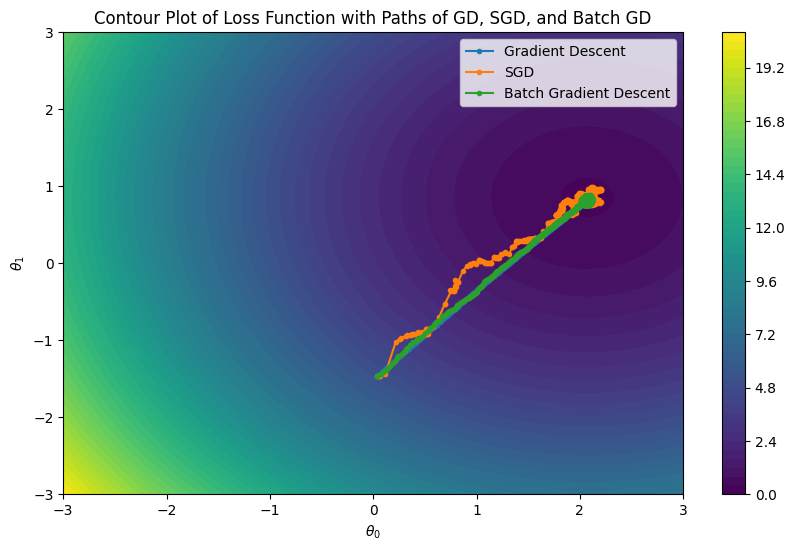

In [ ]:
# Define a shared initial theta for all methods
initial_theta = np.random.randn(3, 1)

# Run each optimization and record paths
theta_gd, gd_path = gradient_descent(X_b, y, initial_theta)
theta_sgd, sgd_path = stochastic_gradient_descent(X_b, y, initial_theta)
theta_batchgd, batchgd_path = batch_gradient_descent(X_b, y, initial_theta)

# Visualize the contour plot of the loss function and the paths of each optimization method
def plot_contours_and_paths(X, y, paths, labels, theta_range=(-3, 3), resolution=100):
    theta0_vals = np.linspace(theta_range[0], theta_range[1], resolution)
    theta1_vals = np.linspace(theta_range[0], theta_range[1], resolution)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute loss for each combination of theta0 and theta1, fixing one theta for simplicity
    loss_vals = np.zeros_like(theta0_grid)
    theta_fixed = 0.5  # Fixed value for theta_2 (second feature weight)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            theta = np.array([[theta0_grid[i, j]], [theta1_grid[i, j]], [theta_fixed]])
            loss_vals[i, j] = compute_loss(X, y, theta)

    # Plot the contour map
    plt.figure(figsize=(10, 6))
    plt.contourf(theta0_grid, theta1_grid, loss_vals, levels=50, cmap='viridis')
    plt.colorbar()

    # Plot paths for each optimization method
    for path, label in zip(paths, labels):
        theta0_path = [theta[0][0] for theta in path]
        theta1_path = [theta[1][0] for theta in path]
        plt.plot(theta0_path, theta1_path, marker='o', markersize=3, label=label)

    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")
    plt.title("Contour Plot of Loss Function with Paths of GD, SGD, and Batch GD")
    plt.legend()
    plt.show()

# Plot contours and paths
plot_contours_and_paths(X_b, y, paths=[gd_path, sgd_path, batchgd_path], labels=["Gradient Descent", "SGD", "Batch Gradient Descent"])


## Done by:

## K Sri Chaitan (BCD 38)